In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle
from scipy import stats

In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data (2009-2019).csv').fillna(0)
data["Date"] = pd.to_datetime(data.Date)
data.set_index ("Date", inplace = True)
data.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [3]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%
...,...,...,...,...,...,...
2009-01-07,147.28,145.25,148.52,142.08,22.54M,1.63%
2009-01-06,144.92,146.34,147.58,142.05,11.56M,-0.36%
2009-01-05,145.45,141.38,146.93,141.35,11.24M,3.60%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2721 entries, 2019-12-31 to 2009-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2721 non-null   float64
 1   Open      2721 non-null   float64
 2   High      2721 non-null   float64
 3   Low       2721 non-null   float64
 4   Vol.      2721 non-null   object 
 5   Change %  2721 non-null   object 
dtypes: float64(4), object(2)
memory usage: 148.8+ KB


In [5]:
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [6]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

In [7]:
data.isnull().sum()

Price        0
Open         0
High         0
Low          0
Vol.        17
Change %     0
dtype: int64

In [8]:
data.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [9]:
data = data.fillna(data["Vol."].mean())

In [10]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [11]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,1.863632,1.851267,1.857495,1.874146,0.287020,0.180120
2019-12-30,1.875259,1.893724,1.858811,1.886207,0.474970,0.356297
2019-12-27,1.902167,1.851598,1.855850,1.896928,0.712317,0.581419
2019-12-26,1.849016,1.866525,1.836439,1.881517,0.661715,0.390396
2019-12-24,1.878581,1.899363,1.852231,1.893243,0.773762,0.242635
...,...,...,...,...,...,...
2009-01-07,2.015579,2.025946,2.019563,2.034763,1.593686,0.882625
2009-01-06,2.031259,2.018715,2.025748,2.034964,0.270807,0.248318
2009-01-05,2.027738,2.051619,2.030025,2.039655,0.232253,2.002201


In [12]:
(np.abs(stats.zscore(data)) > 3).sum()

Price        0
Open         0
High         0
Low          0
Vol.        38
Change %    30
dtype: int64

In [13]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93,-0.24
2019-12-30,732.90,736.10,737.95,727.25,5.37,-0.55
2019-12-27,736.95,729.75,737.50,728.85,3.40,1.10
2019-12-26,728.95,732.00,734.55,726.55,3.82,-0.61
2019-12-24,733.40,736.95,736.95,728.30,2.89,-0.35
...,...,...,...,...,...,...
2009-01-07,147.28,145.25,148.52,142.08,22.54,1.63
2009-01-06,144.92,146.34,147.58,142.05,11.56,-0.36
2009-01-05,145.45,141.38,146.93,141.35,11.24,3.60


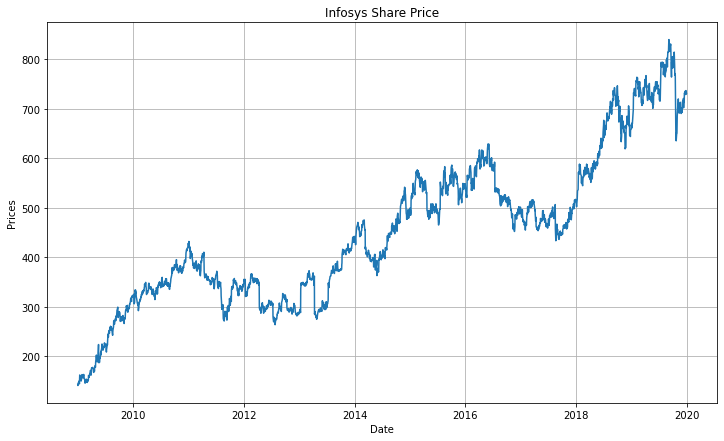

In [14]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

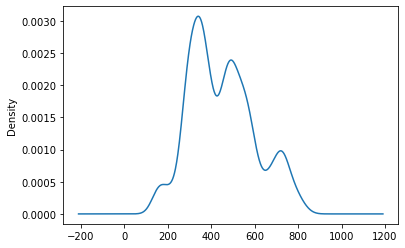

In [15]:
df = data["Price"]
df.plot(kind = "kde")

### SelectKBest

In [16]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,140.4,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Open,,,,,,,,,,,,,,,,,,,,,
138.41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141.38,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
142.83,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
143.24,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
144.48,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
832.05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
836.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,140.4,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
High,,,,,,,,,,,,,,,,,,,,,
142.98,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
144.48,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146.93,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147.34,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
147.58,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
837.95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
840.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,140.4,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Low,,,,,,,,,,,,,,,,,,,,,
137.88,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
138.33,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
138.78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
139.37,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141.17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
826.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
827.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [19]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,140.4,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,140.4,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Change %,,,,,,,,,,,,,,,,,,,,,
-21.26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-13.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-12.66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-9.58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11.13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
shuffled_data = shuffle(data, random_state = 700)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 700)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1904, 5) (817, 5) (1904,) (817,)


In [22]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Low'], dtype='object')

In [23]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,140.40,142.39,143.83,144.92,145.45,145.59,145.99,146.19,146.58,147.03,...,820.10,820.70,821.30,827.70,829.10,829.30,829.85,831.25,834.05,840.15
row_0,,,,,,,,,,,,,,,,,,,,,
137.88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138.33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138.78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139.37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141.17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
824.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data.groupby("Date").sum()

In [25]:
data = data.resample(rule = 'MS').sum()

In [26]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2009-01-01,3044.91,3012.36,3087.70,2962.95,354.870000,16.67
2009-02-01,2932.77,2931.28,2975.67,2877.16,231.880000,-5.57
2009-03-01,3163.62,3155.88,3215.14,3104.59,250.430000,7.75
2009-04-01,2975.67,2946.28,3022.04,2887.13,282.830000,13.68
2009-05-01,3900.74,3878.59,4003.75,3803.67,307.992286,8.59
2009-06-01,4740.64,4730.20,4851.20,4635.64,280.950000,10.67
2009-07-01,5323.02,5287.11,5393.92,5213.98,311.690000,15.56
2009-08-01,5386.55,5377.91,5442.49,5304.06,199.950000,3.55
2009-09-01,5617.35,5589.40,5668.43,5540.21,227.410000,8.17


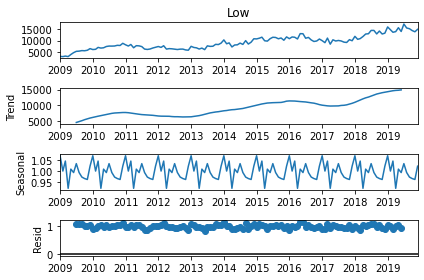

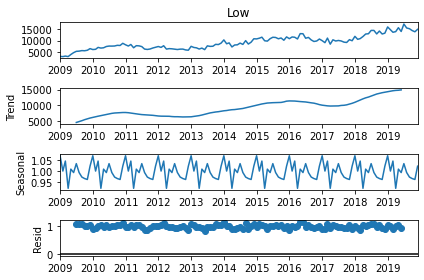

In [27]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

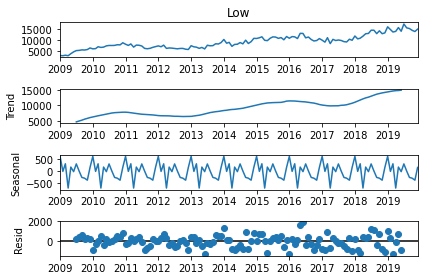

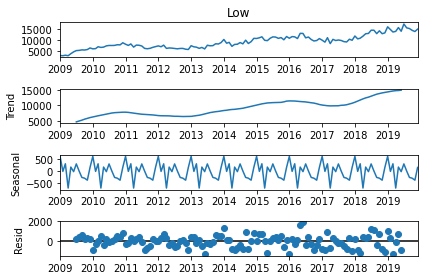

In [28]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [29]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [30]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 12).fit()

In [31]:
test_pred = model.forecast(40)

In [32]:
test_pred

2016-09-01    11587.477430
2016-10-01    11586.437265
2016-11-01    11560.679972
2016-12-01    12302.860582
2017-01-01    12399.891675
2017-02-01    12194.861173
2017-03-01    12613.259645
2017-04-01    11605.016949
2017-05-01    12297.291624
2017-06-01    12464.626370
2017-07-01    12606.951316
2017-08-01    12376.861794
2017-09-01    12555.768329
2017-10-01    12554.728164
2017-11-01    12528.970871
2017-12-01    13271.151481
2018-01-01    13368.182574
2018-02-01    13163.152072
2018-03-01    13581.550544
2018-04-01    12573.307848
2018-05-01    13265.582522
2018-06-01    13432.917269
2018-07-01    13575.242215
2018-08-01    13345.152693
2018-09-01    13524.059228
2018-10-01    13523.019063
2018-11-01    13497.261770
2018-12-01    14239.442380
2019-01-01    14336.473473
2019-02-01    14131.442971
2019-03-01    14549.841443
2019-04-01    13541.598746
2019-05-01    14233.873421
2019-06-01    14401.208168
2019-07-01    14543.533114
2019-08-01    14313.443592
2019-09-01    14492.350127
2

<AxesSubplot:xlabel='Date'>

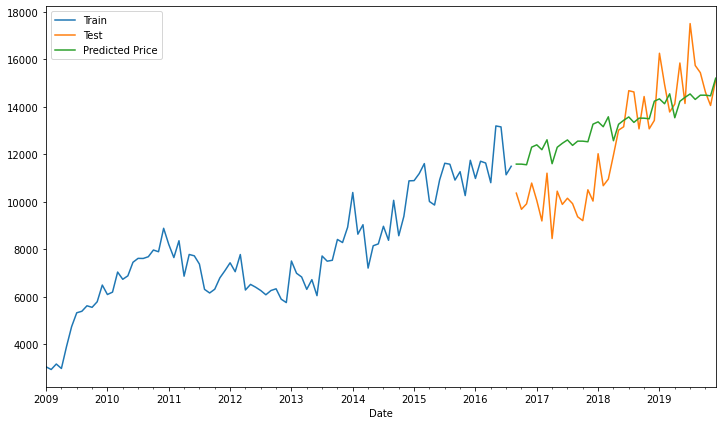

In [33]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [34]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

14.019705783276692

In [35]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

1545.1651757634138

In [36]:
mse = mean_squared_error(test["Price"], test_pred)
mse

3366428.911640145

In [37]:
rmse = math.sqrt(mse)
rmse

1834.783069368187

In [46]:
model = ExponentialSmoothing(train["Low"], trend = "mul", seasonal = "mul", seasonal_periods = 12).fit()

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
test_pred = model.forecast(40)

In [48]:
test_pred

2016-09-01    11503.236178
2016-10-01    11586.705169
2016-11-01    11668.805676
2016-12-01    12557.082779
2017-01-01    13013.897791
2017-02-01    12510.748051
2017-03-01    13483.961353
2017-04-01    11848.201453
2017-05-01    12731.000365
2017-06-01    12683.838076
2017-07-01    13518.095411
2017-08-01    12921.144180
2017-09-01    13044.111460
2017-10-01    13138.761244
2017-11-01    13231.859234
2017-12-01    14239.122353
2018-01-01    14757.128402
2018-02-01    14186.581020
2018-03-01    15290.157664
2018-04-01    13435.285337
2018-05-01    14436.336453
2018-06-01    14382.856707
2018-07-01    15328.864030
2018-08-01    14651.950310
2018-09-01    14791.389236
2018-10-01    14898.717497
2018-11-01    15004.286099
2018-12-01    16146.473583
2019-01-01    16733.867299
2019-02-01    16086.894261
2019-03-01    17338.296609
2019-04-01    15234.961425
2019-05-01    16370.104800
2019-06-01    16309.461363
2019-07-01    17382.187749
2019-08-01    16614.600447
2019-09-01    16772.717422
2

<AxesSubplot:xlabel='Date'>

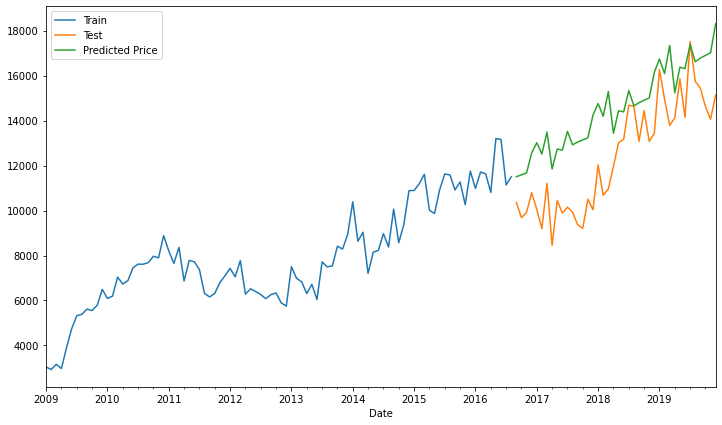

In [49]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [50]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

19.325387515546225

In [51]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

2160.0586218125372

In [52]:
mse = mean_squared_error(test["Price"], test_pred)
mse

6023625.240273669

In [53]:
rmse = math.sqrt(mse)
rmse

2454.3074869041307